In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from skimage import draw

In [3]:
asset_path = "/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/"

map_file = "Town01-padded.jpg"

map_path = os.path.join(asset_path, map_file)

map_1024 = Image.open(map_path)
map_1024.size


(8192, 10240)

In [4]:
def resize(im, x, y, factor):
    return im.resize((int(x/factor), int(y/factor)))

x, y = map_1024.size

In [5]:
map_512 = resize(map_1024, x, y, 2)
map_256 = resize(map_1024, x, y, 4)
map_128 = resize(map_1024, x, y, 8)
map_64 = resize(map_1024, x, y, 16)

In [8]:
map_1024.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-1024.jpg")
map_512.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-512.jpg")
map_256.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-256.jpg")
map_128.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-128.jpg")
map_64.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-64.jpg")

In [45]:
target_loc_4 = (4350, 1500)
target_loc_1 = (4350, 3400)
target_loc_2 = (3650, 3400)
target_loc_3 = (3650, 2350)
agent_loc = (4325, 750)

In [48]:
def scale_coords(coord, factor):
    return (int(coord[0]/factor), int(coord[1]/factor))

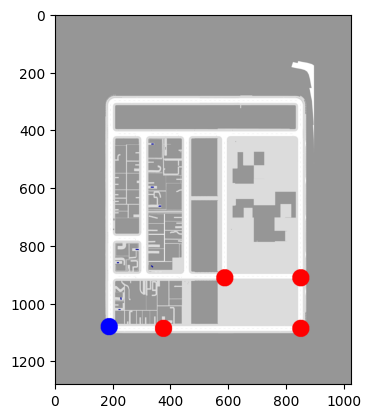

In [49]:
arr = np.array(map_128)
rr, cc = draw.disk(scale_coords(target_loc_1, 4), radius=30)
arr[rr, cc] = (255, 0, 0)

rr, cc = draw.disk(scale_coords(target_loc_2, 4), radius=30)
arr[rr, cc] = (255, 0, 0)

rr, cc = draw.disk(scale_coords(target_loc_3, 4), radius=30)
arr[rr, cc] = (255, 0, 0)

rr, cc = draw.disk(scale_coords(target_loc_4, 4), radius=30)
arr[rr, cc] = (255, 0, 0)

rr, cc = draw.disk(scale_coords(agent_loc, 4), radius=30)
arr[rr, cc] = (0, 0, 255)

plt.imshow(arr)
plt.show()